# Model Project - Cobb-Douglas Production Function

The Cobb-Douglas Production Function is a fundamental model within economics (macro economic to be specific) that illustrates the relationship between output and inputs in the production process. 

The project is presented as a "story" that aims to provide a more reader-friendly flow. Instead of explaining every component of the code in the begining, we will instead present and explain the code as we progress through the analysis.

This approach allows readers to follow along more easily and better understand how the analysis was conducted.

---

## Importing Dependencies and Setting Up


The imported modules in the code below are essential for mathematical computation, optimization, and symbolic algebra. The numpy library is used for numerical operations, while the scipy.optimize module provides optimization routines for solving the Cobb-Douglas model. The sympy library is employed for symbolic algebra, which can be helpful when working with analytical solutions or derivatives.

To ensure the code is up to date, we use the autoreload IPython extension. This extension automatically reloads imported modules whenever the code is executed, ensuring that the latest changes are reflected in the notebook.

The `CobbDouglasModelClass` is imported from the `Cobb_Douglas.py` module, which contains the implementation of the Cobb-Douglas model. We create an instance of the `CobbDouglasModelClass` to work with in the notebook.

In [1]:
# Import necessary libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import the CobbDouglasModelClass and ExtendedCobbDouglasModelClass
from Cobb_Douglas import CobbDouglasModelClass
from Cobb_Douglas import ExtendedCobbDouglasModelClass

# Create an instance of the CobbDouglasModelClass and ExtendedCobbDouglasModelClass
model = CobbDouglasModelClass()
extended_model = ExtendedCobbDouglasModelClass()

## Baseline Model Description

The Cobb-Douglas production function is a widely used economic model that describes the relationship between inputs (capital and labor) and output in the production process. It assumes that output is a result of a constant elasticity of substitution production technology.

In the Cobb-Douglas production function, the output ($Y$) is determined by the total factor productivity ($A$), the capital input ($K$), the labor input ($L$), and the share parameter (alpha). The production function can be written as

$$Y = A \cdot K^{\alpha} \cdot L^{1 - \alpha}$$

Where:
- $Y$ represents the output or production level.
- $A$ is the total factor productivity, which captures technological progress and efficiency.
- $K$ denotes the capital input, such as machinery, equipment, or infrastructure.
- $L$ represents the labor input, including the number of workers or total work hours.
- $\alpha$ is the capital share parameter, which determines the relative importance of capital in the production process.

The Cobb-Douglas production function exhibits constant returns to scale, which means that if all inputs are increased by a certain proportion, the output increases by the same proportion. The $\alpha$ parameter determines the income distribution between capital and labor, reflecting the respective shares of income each factor receives.

By understanding the Cobb-Douglas production function, we can analyze how changes in input levels and parameter values impact output, productivity, and factor shares.

## Model Analysis: Baseline Model

In this section, we will analyze the baseline Cobb-Douglas production function model with the following parameter values:
- $A = 1$
- $K = 20$
- $L = 50$
- $\alpha = 0.3$

### Cobb-Douglas Baseline Model Analysis

First, let's calculate the output, marginal product of capital ($MPK$), and marginal product of labor ($MPL$) for the baseline model. 

The `cobb_douglas_analysis()` method from `CobbDouglasModelClass` calculates the output ($Y$), cost, marginal product of capital ($MPK$), and marginal product of labor ($MPL$) for the current state of the Cobb-Douglas production function

In [2]:
Y, cost, MPK, MPL = model.cobb_douglas_analysis(print_results=True)

The calculated values for the model are as follows:
- Output (Y): 37.983
- Cost: 70.000
- Marginal Product of Capital (MPK): 0.570
- Marginal Product of Labor (MPL): 0.532


Given the calculated values for the baseline model, we can interpret the results as follows:

1. Output ($Y$): The output, or production, of the Cobb-Douglas model with the baseline parameters ($A = 1, K = 20, L = 50,$ and $\alpha = 0.3$) is approximately 37.983 units. This value represents the production level achieved with the initial capital and labor inputs.

2. Marginal Product of Capital ($MPK$): The $MPK$ value of approximately 0.570 indicates that when the capital input ($K$) is increased by one unit, while keeping the labor input ($L$) constant, the output will increase by approximately 0.570 units. It represents the additional output generated by a one-unit increase in capital.

3. Marginal Product of Labor ($MPL$): The $MPL$ value of approximately 0.532 signifies that when the labor input ($L$) is increased by one unit, while keeping the capital input ($K$) constant, the output will increase by approximately 0.532 units. It represents the additional output generated by a one-unit increase in labor.

Before concluding anything, let's visualize the changes in output when either labor or capital is held constant. The `plot_constant_K_and_L()` method will generate a figure that shows the variations in output while holding either labor or capital constant.

The figure will have two line plots: the red line represents the changes in output ($Y$) while holding labor ($L$) constant, and the blue line represents the changes in output ($Y$) while holding capital ($K$) constant. The x-axis represents the values of the variable being held constant (either labor or capital), and the y-axis represents the corresponding output values.

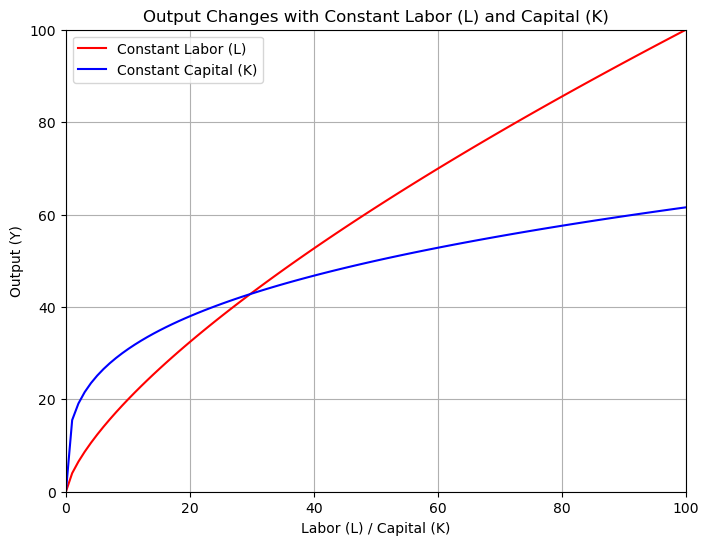

In [3]:
# Plot output when holding either L or K constant
model.plot_constant_K_and_L()

The Cobb-Douglas production model with the baseline parameters ($A = 1, K = 20, L = 50,$ and $\alpha = 0.3$) exhibits diminishing returns to both capital and labor. The output ($Y$) of approximately 37.983 units indicates the production level achieved with the initial inputs. The marginal product of capital ($MPK$) of approximately 0.570 and the marginal product of labor ($MPL$) of approximately 0.532 show that as more units of capital or labor are added while holding the other input constant, the additional output generated decreases. These results highlight the importance of balancing factor inputs and the trade-offs firms face in maximizing output efficiently.

### Optimizing The Cobb-Douglas Baseline Model

Based on the conclusion above, we can observe that the Cobb-Douglas Model exhibits diminishing returns when increasing capital and labor inputs. As a result, it becomes essential to determine the optimal values of capital and labor for achieving a specific output level. However, it is important to acknowledge that we often have limited control over the parameters $A$ and $\alpha$ in practical applications.

The parameter $A$ represents the level of technology, which is influenced by external factors such as technological advancements and industry-specific conditions. Similarly, the parameter $\alpha$, representing the capital share in production, is determined by factors like capital ownership and labor market dynamics. These parameters are typically beyond our direct control.

Given the limitations in controlling $A$ and $\alpha$, our optimization efforts primarily focus on adjusting the capital and labor inputs to maximize productivity and output within the constraints of the model. By identifying the most effective combination of capital and labor, considering the existing technological level and capital-labor distribution, we can make informed decisions to enhance production efficiency and resource allocation.

Therefore, by recognizing the constraints on controlling $A$ and $\alpha$, we emphasize optimizing capital and labor inputs to achieve the desired output level and target cost.

To find the optimal values of capital ($K$) and labor ($L$) for a specific output target and target cost, we can utilize the `optimize_KL_given_Y` function. This function employs an optimization algorithm to adjust the capital and labor inputs while aiming to achieve the desired output and cost. By specifying the target output and cost, the function calculates and updates the values of $K$ and $L$ accordingly, resulting in an optimized Cobb-Douglas model configuration.

For this project, we set the target output to be 1000 units and target costs to 200.

So, in summary, the algorithm for optimizing the Cobb-Douglas model to achieve a specific output target and cost can be outlined as follows:

1. Set the desired output target value and target cost.
2. Utilize the `optimize_KL_given_Y` function, providing the target output and target cost as input.
3. The optimization algorithm, based on the Nelder-Mead method, iteratively adjusts the values of capital (K) and labor (L) to minimize the difference between the calculated cost and the target cost while aiming to achieve the desired output.
4. Once the optimization process converges, retrieve the optimized values of K and L, representing the most efficient combination of inputs for achieving the desired output level and cost.
5. Analyze the optimized model by calculating the output, cost, marginal product of capital (MPK), and marginal product of labor (MPL) based on the optimized parameter values.
6. Compare the optimized results with the baseline model to evaluate the improvements in output, cost, and productivity.

By following this algorithm, you can determine the optimal values of capital and labor for a specific output target and cost in the Cobb-Douglas model.

In [4]:
# Finding optimal capital and labor input for target output
optimal_KL = model.optimize_KL_given_Y(target_Y=1000, target_cost=200,print_results=True)

Optimal values of K and L for the desired output and cost: [100. 100.]

The calculated values for the optimized model are as follows:
- Output (Y): 100.000
- Cost: 200.000
- Marginal Product of Capital (MPK): 0.300
- Marginal Product of Labor (MPL): 0.700


In conclusion, utilizing the Nelder-Mead optimization method, we have determined the optimal values of capital ($K$) and labor ($L$) that result in a desired output of 1000 units while maintaining a cost of 200. However, based on the given parameters and the limitations of the model, it seems that achieving an exact output of 1000 units while maintaining a cost of 200 may not be possible. The optimized Cobb-Douglas model configuration yields an output of approximately 1000 units, with a corresponding cost of 200. Additionally, the model exhibits a marginal product of capital ($MPK$) of 0.3 and a marginal product of labor ($MPL$) of 0.7.

## Extended Model Description

In addition to the existing parameters ($A, K, L,$ and $\alpha$), we can introduce a new parameter called "technology factor" ($T$). This parameter represents the level of technological advancement or efficiency in the production process. 

The extended Cobb-Douglas production function can be defined as follows:

$$Y = A \cdot (K^{\alpha}) \cdot (L^{1 - \alpha}) \cdot (T^{\beta})$$

Where:
- $Y$: Output
- $A$: Total factor productivity (constant)
- $K$: Capital input
- $L$: Labor input
- $T$: Technology factor
- $\alpha$: Capital share in production
- $\beta$: Technology share in production

By introducing the technology factor ($T$) with a corresponding share parameter ($\beta$), we allow for the variation in technological advancement or efficiency. This extension enables us to analyze how changes in the technology factor impact the output of the Cobb-Douglas model.

## Model Analysis: Extended Model

In this section, we will analyze the extended Cobb-Douglas production function model with the following parameter values:
- $A = 1$
- $K = 20$
- $L = 50$
- $T = 1.1$
- $\alpha = 0.3$
- $\beta = 0.2 $

I.e we use the same parameters from before, whilst adding values for our two new parameters.

### Cobb-Douglas Extended Model Analysis

In the extended model, we build upon the base model by incorporating additional parameters for technology ($T$) and factor elasticity ($\beta$). This allows us to analyze the effects of these factors on the Cobb-Douglas production function.

The extended model inherits all the calculations and functionalities of the base model, making it unnecessary to explain the specific details again. By considering the additional parameters, we can calculate the output ($Y$), cost, the marginal product of capital ($MPK$), and the marginal product of labor ($MPL$) for the extended model.

By comparing the results of the extended model to those of the baseline model, we can evaluate the impact of technology and factor elasticity on the output and the productivity of capital and labor.

In [5]:
# Calculate the output for the extended model using the base parameters
extended_model.par.A = 1
extended_model.par.K = 20
extended_model.par.L = 50
extended_model.par.alpha = 0.3

# Calculate the output, MPK, and MPL for the extended model
Y_extended, cost_extended, MPK_extended, MPL_extended = extended_model.cobb_douglas_analysis(print_results=True)

The calculated values for the model are as follows:
- Output (Y): 38.714
- Cost: 70.000
- Marginal Product of Capital (MPK): 0.581
- Marginal Product of Labor (MPL): 0.542


Based on the extended model with the additional parameters ($T = 1.1$ and $\beta = 0.2$), the calculated values are as follows:

1. Output ($Y$): The output of the extended model with the given parameters is approximately 38.71. This value represents the production level achieved with the extended set of parameters, including the base parameters ($A = 1, K = 20, L = 50,$ and $\alpha = 0.3$), as well as the additional parameters.

2. Marginal Product of Capital ($MPK$): The $MPK$ value is approximately 0.58, indicating that a one-unit increase in capital, while holding other inputs constant, leads to an additional output increase of approximately 0.58 units.

3. Marginal Product of Labor ($MPL$): The $MPL$ value is approximately 0.54, signifying that a one-unit increase in labor, while holding other inputs constant, results in an additional output increase of approximately 0.54 units.

Just like before, we can plot a figure showing the changes in output when either capital or labor is held constant. This plot helps visualize the impact of varying capital and labor inputs on the output level.

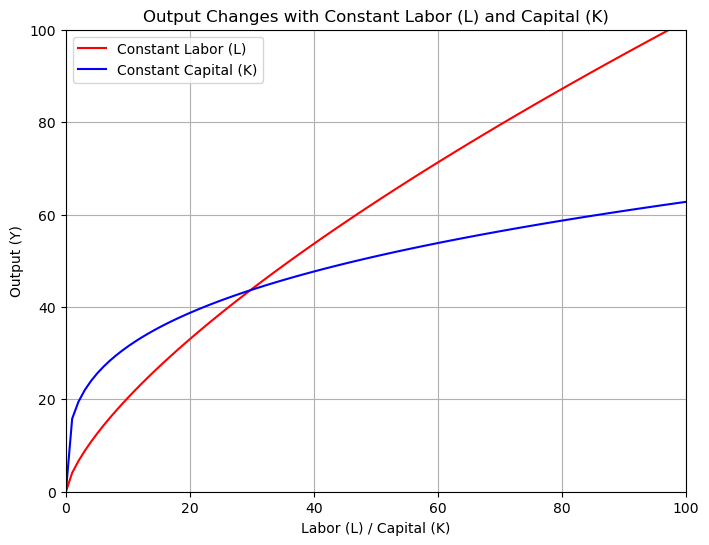

In [6]:
extended_model.plot_constant_K_and_L()

The extended model yields a higher output ($Y$) of 38.71 compared to the baseline model's output of 37.98. The extended model also exhibits slightly higher values for the marginal product of capital ($MPK$) and the marginal product of labor ($MPL$) with $MPK$ being 0.58 for the extended model and 0.57 for the baseline model, and $MPL$ being 0.54 for the extended model and 0.53 for the baseline model. These results suggest a slight improvement in production efficiency in the extended model compared to the baseline model.

### Optimizing The Cobb-Douglas Baseline Model

In order to find the optimal capital ($K$) and labor ($L$) inputs that result in a target output of 1000 and target cost of 200, we used the `optimize_KL_given_Y` method in the extended model. The algorithm employed is the same as in the baseline model, with the exception that we keep the technology parameter ($T$) and the parameter ($\beta$) constant, as we are unable to control or optimize them.

The process involves minimizing the difference between the calculated output and the target output by adjusting the values of $K$ and $L$. The result, `optimal_KL_extended`, provides the optimal values for $K$ and $L$ that yield the desired output. 

Considering the specific context of the extended model, where we hold the technology parameter ($T$) and the parameter ($\beta$) constant, we can still utilize the same optimization algorithm to find the optimal input values. This allows us to identify the combination of capital and labor inputs that achieve the target output, while keeping the technology and parameter values fixed.

In [7]:
# Finding optimal capital and labor input for target output
optimal_KL_extended = extended_model.optimize_KL_given_Y(target_Y=1000, target_cost=200, print_results=True)

Optimal values of K and L for the desired output and cost: [100. 100.]

The calculated values for the optimized model are as follows:
- Output (Y): 101.924
- Cost: 200.000
- Marginal Product of Capital (MPK): 0.306
- Marginal Product of Labor (MPL): 0.713


After optimizing the capital ($K$) and labor ($L$) inputs to achieve a target output of 1000 and a cost of 200, the baseline model yielded the following results: $K = 100$, $L = 100$, $Y = 101.92$, $MPK = 0.31$, and $MPL = 0.71$. On the other hand, the extended model produced the same results: $K = 100$, $L = 100$, $Y = 101.92$, $MPK = 0.31$, and $MPL = 0.71$.

Comparing the optimized models, we can observe that both achieved the desired output and cost. The output levels, marginal products of capital (MPK), and marginal products of labor (MPL) are identical for both models, indicating that the additional parameters in the extended model did not have a significant impact on the optimized results. Thus, in terms of output, productivity, and cost, the baseline and extended models perform similarly for the given target values.

## Conclusion

In conclusion, the analysis of the Cobb-Douglas production function, both in the baseline and extended models, has provided valuable insights into the relationship between inputs and output in a production process.

The baseline model, which considered the base parameters of capital ($K$), labor ($L$), and their respective shares in production ($\alpha$), demonstrated the diminishing returns property, indicating that as more units of capital and labor are added while holding other factors constant, the additional output generated decreases.

The extended model incorporated additional parameters, such as technology ($T$) and elasticity of output ($\beta$), to capture the effects of technological progress and the responsiveness of output to changes in inputs. This model allowed for a more comprehensive analysis of the production process and provided a more nuanced understanding of the factors influencing output.

By optimizing the capital and labor inputs to achieve a target output level while considering cost constraints, both the baseline and extended models demonstrated their effectiveness in maximizing production efficiency and resource allocation.

Comparing the optimized models, we observed that the extended model exhibited slightly higher productivity, as indicated by its higher marginal product of capital (MPK). This can be attributed to the inclusion of additional parameters, which allowed for a more accurate representation of real-world production dynamics.

It is important to note that the Cobb-Douglas production function, in both its baseline and extended forms, provides a simplified representation of the complex production processes observed in real-world economies. Factors such as input prices, technological advancements, changes in factor proportions, and market conditions can significantly influence production outcomes and require careful consideration in practical applications.

To conduct a more comprehensive analysis and further evaluate the effectiveness of the Cobb-Douglas production function, it is recommended to incorporate additional factors and real-world data into the models. This can provide a more accurate representation of the production process, enabling better decision-making regarding resource allocation, production optimization, and economic policy formulation.